# Representation visualization

In [1]:
# Retina quality plots
%config InlineBackend.figure_format = 'retina'

In [2]:
X_TRAIN_PATH = 'data/features_data/fingerprints_subj_split/neg_subs/Circular_(Morgan)/X_train.parquet'
X_VALID_PATH = 'data/features_data/fingerprints_subj_split/valid/Circular_(Morgan)/X_valid_balanced.parquet'
Y_TRAIN_PATH = 'data/features_data/fingerprints_subj_split/neg_subs/Circular_(Morgan)/y_train.parquet'
Y_VALID_PATH = 'data/features_data/fingerprints_subj_split/valid/Circular_(Morgan)/y_valid_balanced.parquet'
FULL_DATA_PATH = 'data/combined/clustered/final/Galson_2015a.parquet'
REPRESENTATION_TYPE = 'Circular fingerprints'

In [3]:
# Parameters
X_TRAIN_PATH = "data/features_data/kmers/neg_subs/X_train.parquet"
X_VALID_PATH = "data/features_data/kmers/X_valid_balanced.parquet"
Y_TRAIN_PATH = "data/features_data/kmers/neg_subs/y_train.parquet"
Y_VALID_PATH = "data/features_data/kmers/y_valid_balanced.parquet"
REPRESENTATION_TYPE = "k-mers"


## Load data

In [4]:
import pandas as pd

features_data = pd.concat([
    pd.read_parquet(X_TRAIN_PATH),
    pd.read_parquet(X_VALID_PATH)
])

features_data.info()
features_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122896 entries, 5573770 to 2604462
Columns: 8000 entries, AAA to YYY
dtypes: uint16(8000)
memory usage: 1.8 GB


,AAA,AAC,AAD,AAE,AAF,AAG,AAH,AAI,AAK,AAL,...,YYM,YYN,YYP,YYQ,YYR,YYS,YYT,YYV,YYW,YYY
5573770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5243680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2202726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4758490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1886152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y_train = pd.read_parquet(Y_TRAIN_PATH)['HepB']
y_valid = pd.read_parquet(Y_VALID_PATH)['HepB']

y_data = pd.concat([
    y_train,
    y_valid
])

y_data.head()

5573770    False
5243680    False
2202726     True
4758490    False
1886152     True
Name: HepB, dtype: bool

In [6]:
pos_features_data = features_data[y_data]

pos_features_data.info()
pos_features_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61448 entries, 2202726 to 557437
Columns: 8000 entries, AAA to YYY
dtypes: uint16(8000)
memory usage: 938.1 MB


,AAA,AAC,AAD,AAE,AAF,AAG,AAH,AAI,AAK,AAL,...,YYM,YYN,YYP,YYQ,YYR,YYS,YYT,YYV,YYW,YYY
2202726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1886152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
441998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2678103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4231574,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
clustered_data = pd.read_parquet(FULL_DATA_PATH)

clustered_data.info()
clustered_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14738476 entries, 0 to 24
Data columns (total 26 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   num_errors     object
 1   redundancy     int64 
 2   name           int64 
 3   seq            object
 4   v              object
 5   cdr3           object
 6   original_name  object
 7   errors         object
 8   j              object
 9   data           object
 10  Longitudinal   object
 11  Chain          object
 12  Author         object
 13  Isotype        object
 14  Age            object
 15  Size_igblastn  int64 
 16  Disease        object
 17  Link           object
 18  BSource        object
 19  BType          object
 20  Size           int64 
 21  Species        object
 22  Vaccine        object
 23  Subject        object
 24  cdr3_len       int64 
 25  Cluster_ID     int64 
dtypes: int64(6), object(20)
memory usage: 3.0+ GB


,num_errors,redundancy,name,seq,v,cdr3,original_name,errors,j,data,...,Disease,Link,BSource,BType,Size,Species,Vaccine,Subject,cdr3_len,Cluster_ID
0,2,1,25814,SVKVSCKASGYNSATFGLCWVRQAPGEGLEWIGWISGYNGNTYYVP...,IGHV1-18*03,ARRAPFGFDH,127395,"[('70', 'Q'), ('103', 'L')]",IGHJ1*01,"{""fwh1"": {""24"": ""K"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://www.sciencedirect.com/science/article/...,PBMC,Unsorted-B-Cells,257563,human,HepB,Subject-1070,10,1
1,1,8,29478,SVKVSCKASGYNSATFGLCWVRQAPGEGLEWIGWISGYNGNTYYVP...,IGHV1-18*03,ARRAPFGFDH,125855,"[('70', 'Q')]",IGHJ1*01,"{""fwh1"": {""24"": ""K"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://www.sciencedirect.com/science/article/...,PBMC,Unsorted-B-Cells,257563,human,HepB,Subject-1070,10,1
2,1,12,31543,SVKVSCKASGYNSATFGLCWVRQAPGEGLEWIGWISGYNGNTYYVP...,IGHV1-18*03,ARRAPFGFDH,109459,"[('70', 'Q')]",IGHJ1*01,"{""fwh1"": {""24"": ""K"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://www.sciencedirect.com/science/article/...,PBMC,Unsorted-B-Cells,257563,human,HepB,Subject-1070,10,1
3,1,1,38523,SVKVSCKASGYNSATFGLCWVRQAPGEGLEWIGWISGYNGNTYYVP...,IGHV1-18*03,ARRAPFGLDH,128305,"[('70', 'Q')]",IGHJ1*01,"{""fwh1"": {""24"": ""K"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://www.sciencedirect.com/science/article/...,PBMC,Unsorted-B-Cells,257563,human,HepB,Subject-1070,10,1
4,1,1,50198,SVRVSCKASGYNSATFGLCWVRQAPGEGLEWIGWISGYNGNTYYVP...,IGHV1-18*03,ARRAPFGFDH,125829,"[('70', 'Q')]",IGHJ1*01,"{""fwh1"": {""24"": ""K"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://www.sciencedirect.com/science/article/...,PBMC,Unsorted-B-Cells,257563,human,HepB,Subject-1070,10,1


## HepB sequences - t-SNE

In [8]:
from MulticoreTSNE import MulticoreTSNE as TSNE

TSNE_COMPONENTS = 2
RANDOM_STATE = 42

# t-SNE
pos_tsne_output = TSNE(n_components=TSNE_COMPONENTS, random_state=RANDOM_STATE, n_jobs=-1).fit_transform(pos_features_data)

In [9]:
import numpy as np

TRAIN_LABEL = 'Train'
VALID_LABEL = 'Valid'

def tsne_data(tsne, X_data, y_data, train_cnt, valid_cnt):
    cl_grouped = clustered_data[clustered_data['Cluster_ID'].isin(X_data.index)].groupby('Cluster_ID')
    source_subj_clusters = cl_grouped['Subject'].unique().value_counts()
    
    print(f'Single subject clusters: {", ".join(sorted(np.array([subjects for subjects in source_subj_clusters.index if len(subjects) == 1]).flatten()))}')
    
    cl_majority_subjects = cl_grouped['Subject'].agg(lambda x: x.mode()[0])
    cl_majority_subjects = cl_majority_subjects.loc[X_data.index]

    print(f'Majority subjects for clusters: {", ".join(sorted(cl_majority_subjects.unique()))}')
    
    cluster_sizes = cl_grouped.size()
    cluster_sizes = cluster_sizes.loc[X_data.index].rename('Size')
    
    # Dataframe containing all the information
    df = pd.DataFrame(tsne)
    df['Size'] = cluster_sizes.values
    df['Subject'] = cl_majority_subjects.values
    df['HepB'] = y_data.values

    df['Dataset'] = [TRAIN_LABEL for _ in range(train_cnt)] + [VALID_LABEL for _ in range(valid_cnt)]
    
    return df

In [10]:
pos_df = tsne_data(pos_tsne_output, pos_features_data, y_data.loc[pos_features_data.index], (y_train == True).sum(), (y_valid == True).sum())
pos_df

Single subject clusters: Subject-1066, Subject-1070, Subject-1380, Subject-1776, Subject-1848


Majority subjects for clusters: Subject-1066, Subject-1070, Subject-1380, Subject-1776, Subject-1848


,0,1,Size,Subject,HepB,Dataset
0,3.414336,2.439240,1,Subject-1066,True,Train
1,-10.444248,-14.231691,1,Subject-1776,True,Train
2,-7.924196,-3.586117,2,Subject-1066,True,Train
3,-10.213729,-30.830241,1,Subject-1380,True,Train
4,-23.928968,10.315484,3,Subject-1776,True,Train
...,...,...,...,...,...,...
61443,-4.084383,21.392240,1,Subject-1070,True,Valid
61444,12.897273,-6.877715,1,Subject-1070,True,Valid
61445,25.051618,-0.791380,5,Subject-1070,True,Valid
61446,2.026800,4.730861,1,Subject-1070,True,Valid


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

MARKER_SIZE_DIV = 10
DEFAULT_MARKER_SIZE = 5
ALPHA = 0.5
LARGEST_CLUSTERS_CNT = 5

TRAINING_MARKER = 'o'
VALIDATION_MARKER = 'D'

unique_subjects = sorted(clustered_data['Subject'].unique(), reverse=True)
color_palette = itertools.cycle(sns.color_palette(n_colors=len(unique_subjects)))

# Plot attributes
subject_colors = {
    subject: color
    for subject, color in zip(unique_subjects, color_palette)
}
dataset_markers = {
    VALID_LABEL: VALIDATION_MARKER,
    TRAIN_LABEL: TRAINING_MARKER
}
hepb_color_palette = itertools.cycle(sns.color_palette())
hepb_colors = {
    True: next(hepb_color_palette),
    False: next(hepb_color_palette)
}
hepb_labels = {
    True: 'HepB',
    False: 'Non-HepB'
}

def tsne_plot(tsne_df, hepb_grouping=False):
    _, ax = plt.subplots(figsize=(12,8))

    # Legend entry constructor
    legend_entry = lambda marker, color: plt.plot([],[], marker=marker, color=color, ls='None')[0]

    datasets = list(dataset_markers.keys())
    
    if hepb_grouping:
        grouped_df = tsne_df.groupby(['HepB', 'Dataset'])
        for (hepb, dataset), group in grouped_df:
            group.plot.scatter(ax=ax, x=0, y=1,
                               marker=dataset_markers[dataset],
                               color=hepb_colors[hepb], 
                               s=(group['Size'] / MARKER_SIZE_DIV) + DEFAULT_MARKER_SIZE, 
                               linewidth=0, 
                               alpha=ALPHA)
        
        ax.set(title=f'{REPRESENTATION_TYPE} t-SNE')

        # Legend
        hepb_vals = sorted(hepb_colors.keys())
        handles = [legend_entry('o', hepb_colors[hepb]) for hepb in hepb_vals]
        labels = [hepb_labels[key] for key in hepb_vals] + datasets
    else:
        # Scatter plot
        grouped_df = tsne_df.groupby(['Subject', 'Dataset'])
        for (subject, dataset), group in grouped_df:
            group.plot.scatter(ax=ax, x=0, y=1,
                               marker=dataset_markers[dataset],
                               color=subject_colors[subject], 
                               s=(group['Size'] / MARKER_SIZE_DIV) + DEFAULT_MARKER_SIZE, 
                               linewidth=0, 
                               alpha=ALPHA)

        ax.set(title=f'{REPRESENTATION_TYPE} t-SNE of HepB sequences')
        
        # Legend
        subjects = sorted(list(tsne_df['Subject'].unique()))
        handles = [legend_entry('o', subject_colors[subj]) for subj in subjects]
        labels = subjects + datasets
    
    handles += [legend_entry(dataset_markers[dataset], 'black') for dataset in datasets]
    labels.append(f'Size = size/{MARKER_SIZE_DIV} + {DEFAULT_MARKER_SIZE}')
    handles.append(legend_entry(None, None))

    plt.legend(handles, labels);

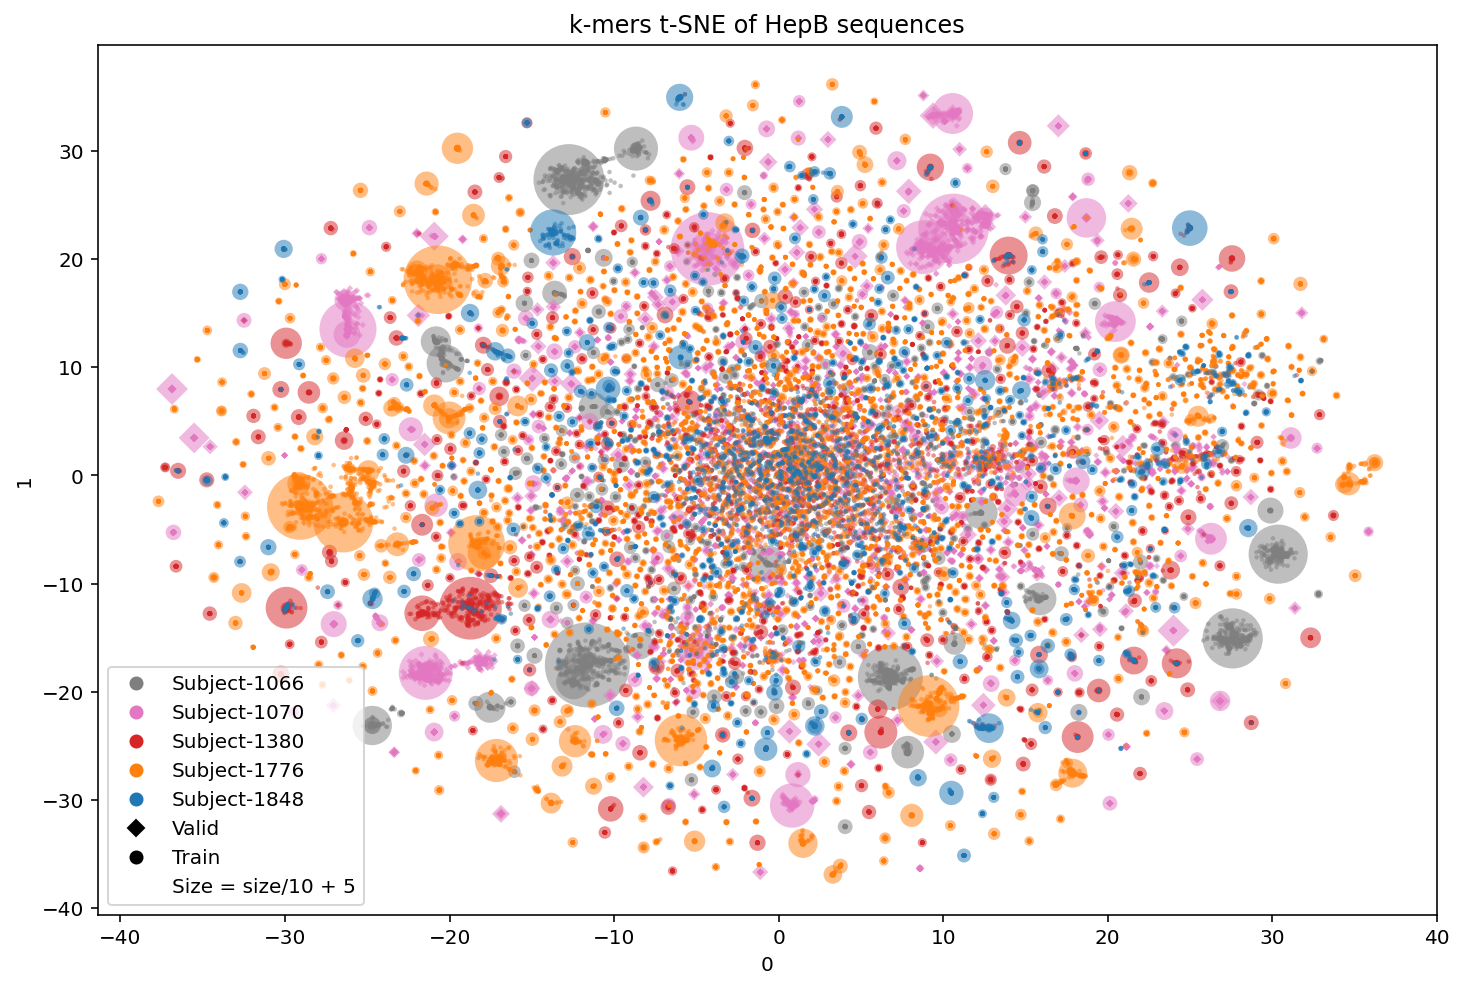

In [12]:
tsne_plot(pos_df)

## All sequences - t-SNE

In [13]:
all_tsne_output = TSNE(n_components=TSNE_COMPONENTS, random_state=RANDOM_STATE, n_jobs=-1).fit_transform(features_data)

In [14]:
all_df = tsne_data(all_tsne_output, features_data, y_data, len(y_train), len(y_valid))
all_df

Single subject clusters: Subject-1032, Subject-1066, Subject-1070, Subject-1212, Subject-1368, Subject-1380, Subject-1614, Subject-1776, Subject-1848


Majority subjects for clusters: Subject-1032, Subject-1066, Subject-1070, Subject-1212, Subject-1368, Subject-1380, Subject-1614, Subject-1776, Subject-1848


,0,1,Size,Subject,HepB,Dataset
0,-4.527894,0.415974,207,Subject-1066,False,Train
1,4.000815,7.116266,8,Subject-1776,False,Train
2,0.469304,-3.062865,1,Subject-1066,True,Train
3,12.850038,-14.675040,1,Subject-1066,False,Train
4,-11.546179,-14.368510,1,Subject-1776,True,Train
...,...,...,...,...,...,...
122891,2.357120,1.724346,93,Subject-1032,False,Valid
122892,4.472615,-3.195929,1,Subject-1070,True,Valid
122893,0.869944,-10.742407,1,Subject-1070,True,Valid
122894,-2.824487,4.217635,1,Subject-1032,False,Valid


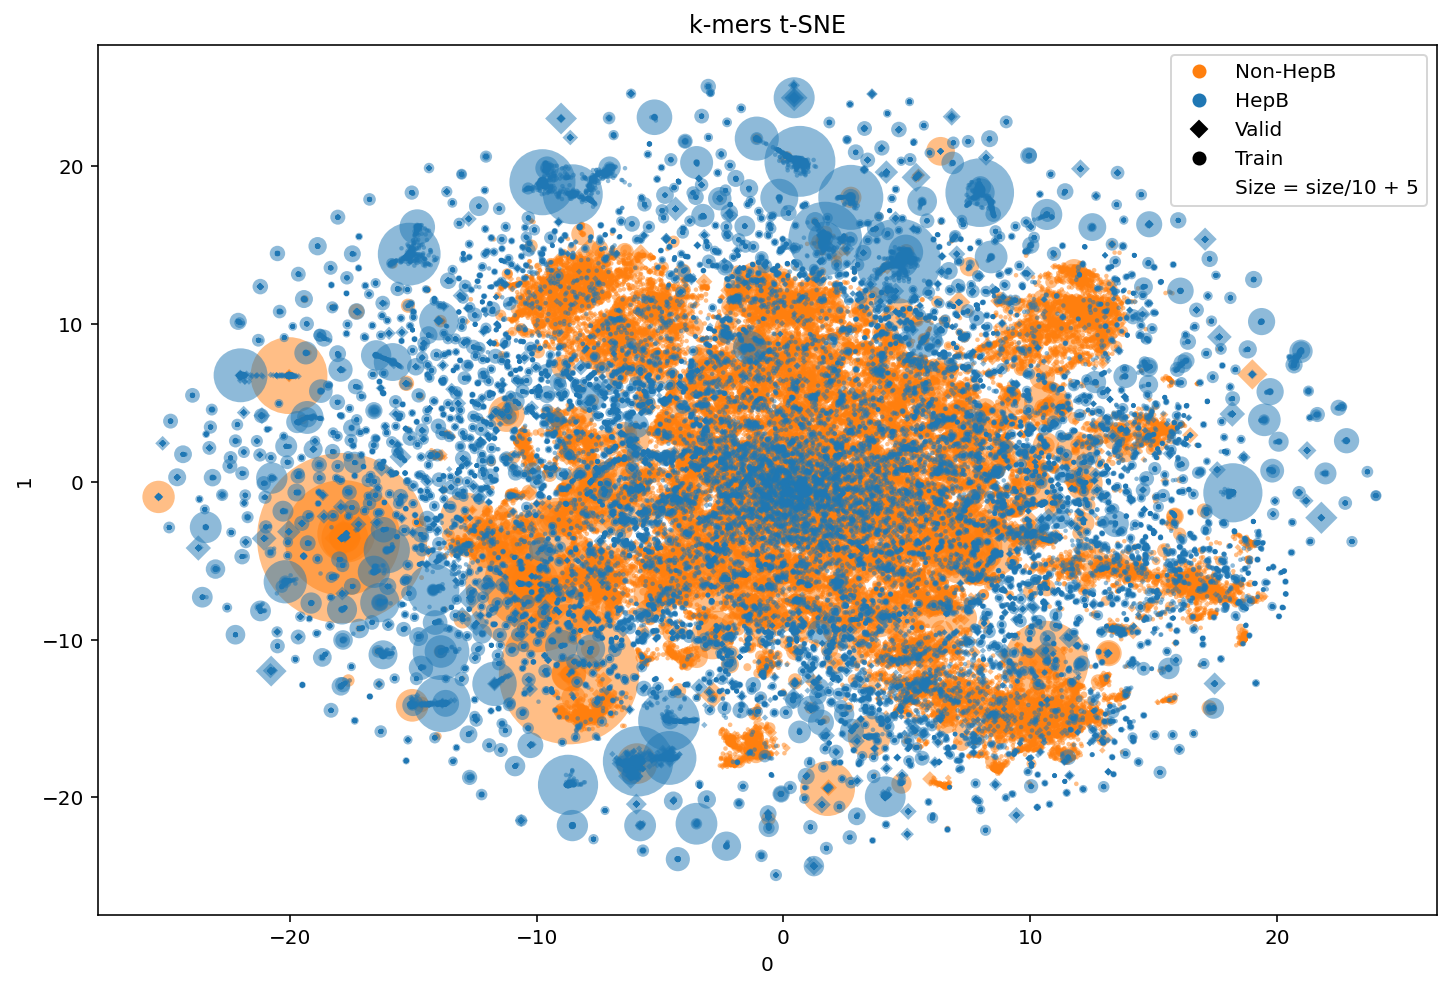

In [15]:
tsne_plot(all_df, hepb_grouping=True)